# HW 4-2. SVM

- Main practice:
    - Use SVM class in scikit-learn library.
    - Implement your own linear SVM machine and compare it with SVM in scikit-learn.
    - Use kernel method to predict a dataset with multimodal distribution.

In [1]:
%matplotlib inline 

import autograd.numpy as np
import autograd.numpy.random as npr

from autograd import grad

import scipy.optimize

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from YourAnswer import score_function, prediction_function, hinge_loss, objective_function, gridsearch
from utils import vis_data, vis_hyperplane, plot_svc, plot_all, gen_multimodal
np.random.seed(1234)

## 1. Data Preparation

We generate binary class synthetic data ${\textbf{x}^{(i)}, y^{(i)}}_{i=1,...,n}$ that the distribution of each class is:
$$
p(\mathbf{x}|y=1) \sim ~ N(\mathbf{\mu_1}, \mathbf{I})\\
p(\mathbf{x}|y=-1) \sim ~ N(\mathbf{\mu_2}, \mathbf{I})\\
where\ \mu_1 = [1 \ \   1]^T, \mu_2 = [-1 -1]^T, 
$$

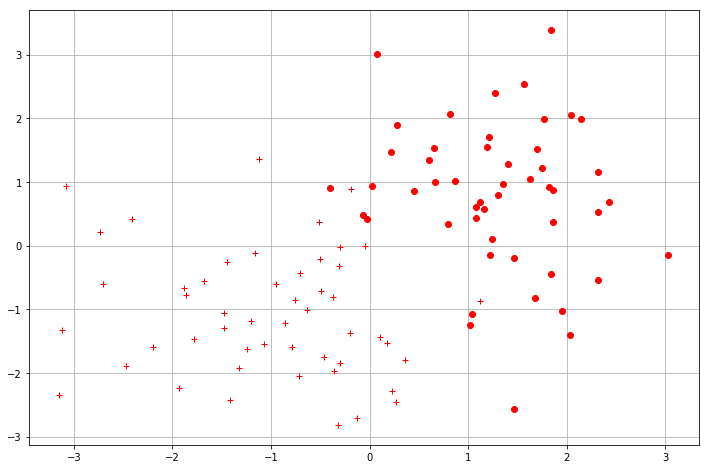

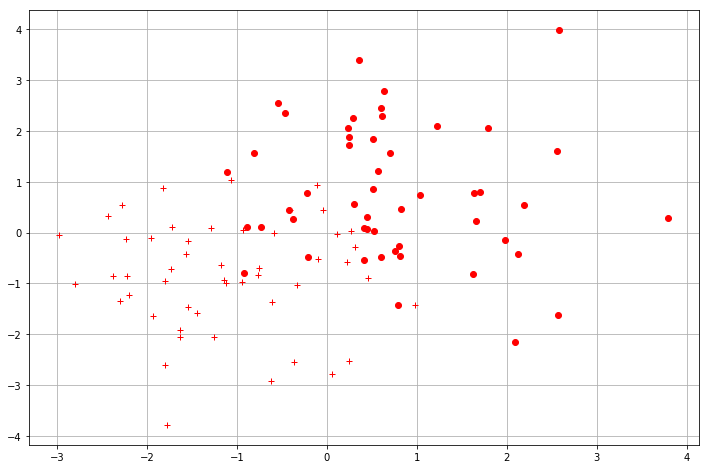

In [2]:
from sklearn.datasets import make_blobs
n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
y_train = (y_train * 2) - 1
y_test = (y_test * 2) - 1

vis_data(x_train, y_train, c='r')
vis_data(x_test, y_test, c='r')

# 2. Binary classification with SVM

## 2.1. SVM by sklearn 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [3]:
n = 5
d = 3
C = 1
x_val = np.random.randn(n,d-1)
y_val = np.random.randint(0, 2, n)
y_val[y_val==0] = -1
w_val = np.random.randn(d)

Number of support vectors:  14


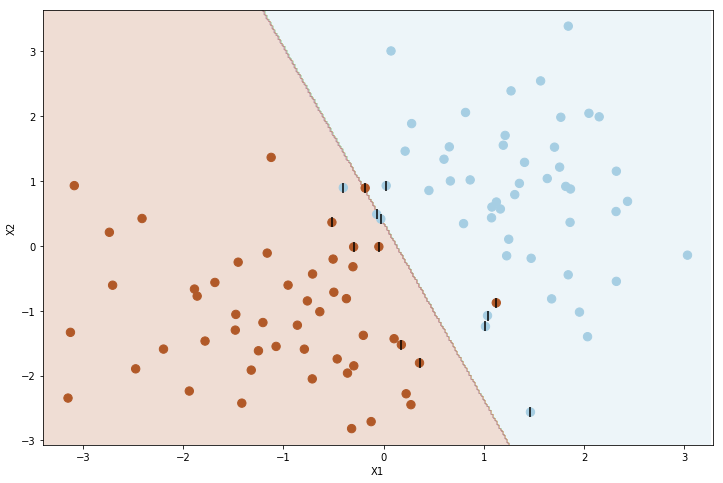

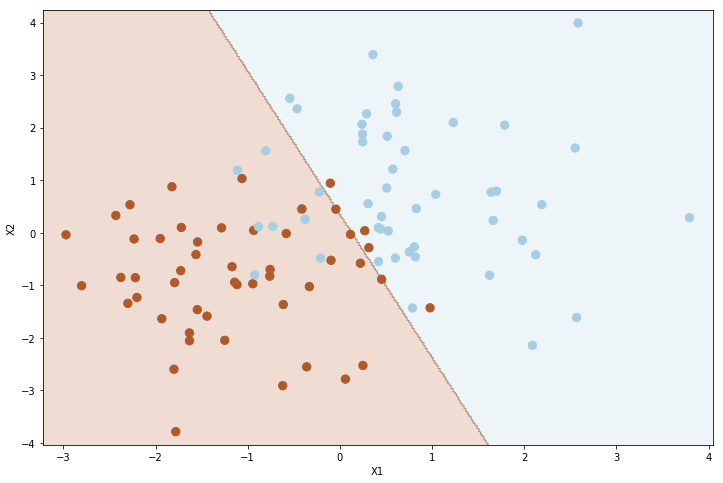

In [4]:
svm = SVC(C= 1.0, kernel='linear')
svm.fit(x_train, y_train)


plot_svc(svm, x_train, y_train, plot_support_vector=True)
plot_svc(svm, x_test, y_test, plot_support_vector=False)

## 2.2. Your SVM

The objective function of SVM is defined as:
$$
\text{minimize}_{\mathbf{\theta}_1\in\mathbb{R}^d, \theta_0\in\mathbb{R}} \frac{1}{2}||\theta_1||_2^2 + C\sum_{i=1}^nL_{Hinge}(h,(\mathbf{x}^{(i)},y^{(i)}))\\
\text{where } L_{Hinge}(h,(\mathbf{x},y)) = (1-y\cdot(\theta_1^T\mathbf{x}+\theta_0))_+\\
$$

What you need to do is implementing all parts of functions step by step.

### 2.2.1. Score function

Score function:
$$
s_\theta(y, \mathbf{x}) = y\cdot(\theta_1^T\mathbf{x}+\theta_0)
$$

Your score function would return following values

`array([-0.83192101,  0.95973002,  1.13836685, -1.10228984, -1.0097472 ])`

In [5]:
score_function(x_val, y_val, w_val)

array([-0.83192101,  0.95973002,  1.13836685, -1.10228984, -1.0097472 ])

In [31]:
score = np.zeros_like(y_val)
print(y_val)
print((np.dot(x_val,w_val[1:]) + w_val[:1]))
print(x_val.dot(w_val[1:]) + w_val[:1])


[-1  1  1  1 -1]
[ 0.83192101  0.95973002  1.13836685 -1.10228984  1.0097472 ]
[ 0.83192101  0.95973002  1.13836685 -1.10228984  1.0097472 ]


In [7]:
for i in range(x_val.shape[0]):
    np.append(x_val[i],  np.array([1]))
    print(x_val[i])
print(x_val.dot(w_val[1:]))
print(w_val[:1])
print(x_val.dot(w_val[1:]) + w_val[:1])
print(y_val)

[ 0.90127087  0.7525282 ]
[ 1.22296763  0.86364166]
[-0.27272686  1.0056245 ]
[ 0.01159673 -0.9017778 ]
[ 0.61952971  0.90213171]
[ 0.87586456  1.00367358  1.1823104  -1.05834629  1.05369075]
[-0.04394355]
[ 0.83192101  0.95973002  1.13836685 -1.10228984  1.0097472 ]
[-1  1  1  1 -1]


### 2.2.2. Prediction function


Predict function:
$$
sign(\theta_1^T\mathbf{x}+\theta_0)
$$


Your prediction function would return following values

`array([ 1.,  1.,  1., -1.,  1.])`

In [8]:
prediction_function(x_val, w_val)

array([ 1.,  1.,  1., -1.,  1.])

In [9]:
prediction = np.sign(x_val.dot(w_val[1:]) + w_val[:1])
print(prediction)

[ 1.  1.  1. -1.  1.]


### 2.2.3. Hinge loss
Hinge loss:
$$
L_{Hinge}(h,(\mathbf{x},y)) = (1-s_\theta(y, \mathbf{x}))_+\\
$$

Your hinge_loss would return following values

`array([1.83192101, 0.04026998, 0.        , 2.10228984, 2.0097472 ])`

In [10]:
hinge_loss(x_val, y_val, w_val)

array([ 1.83192101,  0.04026998,  0.        ,  2.10228984,  2.0097472 ])

In [11]:
y_val.max

<function ndarray.max>

### 2.2.4. Objective function
Objective function:
$$
\text{minimize}_{\mathbf{\theta}_1\in\mathbb{R}^d, \theta_0\in\mathbb{R}} \frac{1}{2}||\theta_1||_2^2 + C\sum_{i=1}^nL_{Hinge}(h,(\mathbf{x}^{(i)},y^{(i)}))\\
$$

Your objective_function would return following values

`6.672833364630736`

In [12]:
objective_function(w_val, x_val, y_val, C)

6.6728333646307361

In [13]:
loss = 1 - score_function(x_val, y_val, w_val)
print(loss)
loss = np.clip(loss, 0, np.argmax(loss))
print(loss)

[ 1.83192101  0.04026998 -0.13836685  2.10228984  2.0097472 ]
[ 1.83192101  0.04026998  0.          2.10228984  2.0097472 ]


In [29]:
theta_1 = w_val[1:]
print(theta_1)
print(theta_1.dot(theta_1))
print(theta_1)
obj = np.dot(theta_1, theta_1) / 2

obj += np.sum(C * hinge_loss(x_val, y_val, w_val))

print(hinge_loss(x_val, y_val, w_val))
print(x_val)

[-0.00803461  1.1735187 ]
1.37721068694
[-0.00803461  1.1735187 ]
[ 1.83192101  0.04026998  0.          2.10228984  2.0097472 ]
[[ 0.90127087  0.7525282 ]
 [ 1.22296763  0.86364166]
 [-0.27272686  1.0056245 ]
 [ 0.01159673 -0.9017778 ]
 [ 0.61952971  0.90213171]]


### 3. Training Process

In this subsubsection, we do not derive an analytic solution of objective function directly. Instead, we use autograd that automatically calculate the gradient function.

*Caution:
To use the `autograd` library, your vector operation in the objective function should be `autograd.numpy`. Do not use the operation in `numpy` library that it should make a runtime error.

In [15]:
svm_rule = grad(objective_function)
print(svm_rule)

<function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x00000246A4FED840>


In [16]:
def _objective_function(w, x, y, C):
    return objective_function(w, x, y, C), svm_rule(w, x, y, C)

In [17]:
w0 = 1e-4 * npr.randn(n_dim+1); w0[-1] = 0.
w = np.copy(w0)
print(w, w0, n_dim)
print(np.sum(hinge_loss(x_train, y_train, w)))
#print(hinge_loss(x_train, y_train, w))
#print(score_function(x_train, y_train, w))
#print(x_train.dot(w[1:]))
res = scipy.optimize.minimize(_objective_function, w0, (x_train, y_train, 1), 
                              method='L-BFGS-B', jac=True, options={'maxls': 100})
w = res.x
print(w, w0, res)

[ -9.47382187e-06  -5.88490857e-05   0.00000000e+00] [ -9.47382187e-06  -5.88490857e-05   0.00000000e+00] 2
99.9931646351
[ 0.25327825 -1.95291325 -0.71645686] [ -9.47382187e-06  -5.88490857e-05   0.00000000e+00]       fun: 10.822452715747193
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        , -0.38116408, -0.33730242])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 100
      nit: 22
   status: 0
  success: True
        x: array([ 0.25327825, -1.95291325, -0.71645686])


'L-BFGS-B' is one of the optimizing algorithms, and it can be a good option for minimizing the objective function.

For further information, please refer to this website:

https://en.wikipedia.org/wiki/Limited-memory_BFGS

miss_classified data= 5


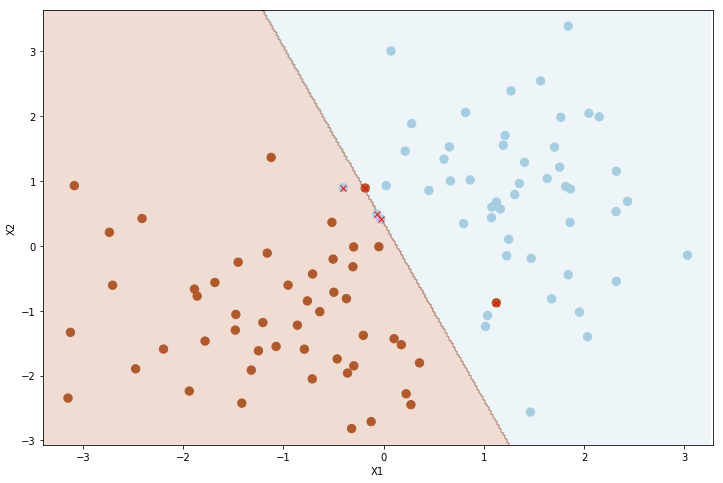

In [18]:
plot_svc(prediction_function, x_train, y_train, plot_mis=True, sklearn=False, w=w)

## 4. Testing

miss_classified data= 13


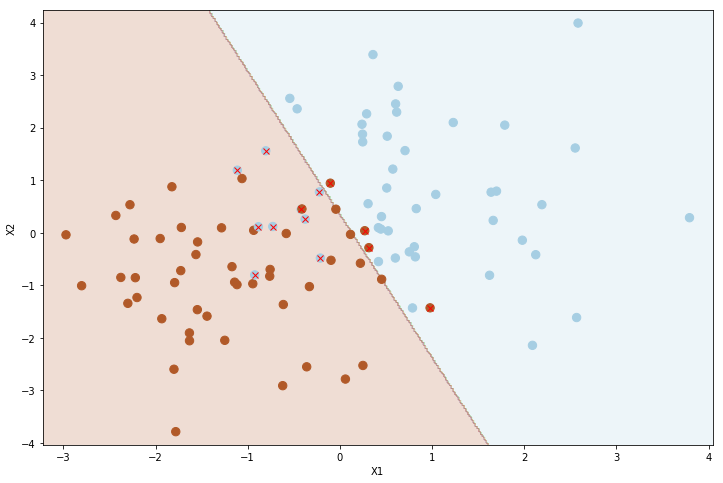

In [19]:
plot_svc(prediction_function, x_test, y_test, plot_mis=True, sklearn=False, w=w)

### Compare three methods( SVM by sklearn, SVM by autograd, Logisitic regression)

Let's fit the data using logistic regression first

In [20]:
logistic = LogisticRegression(C= 1.0, solver='lbfgs')
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Now, we can compare results from three different methods for the data

Because of different optimizing ways, the decision boundaries would not be exactly the same.


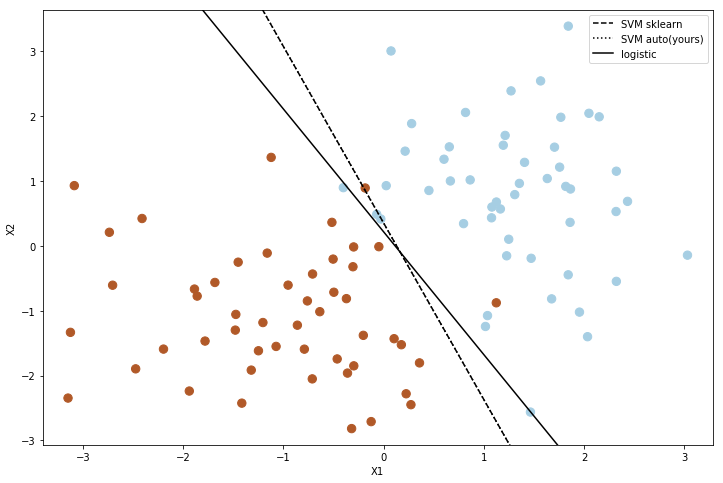

In [21]:
plot_all(svm, w, logistic, x_train, y_train)

## 5. Predicting a dataset with multimodal distribution 

In section 5, we predict a dataset with multimodal distribution by using `kernel method` in scikit-learn.

## 5.1. Multimodal dataset

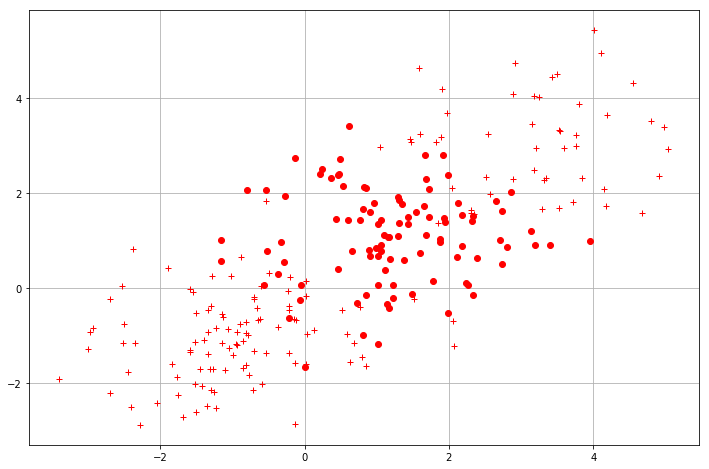

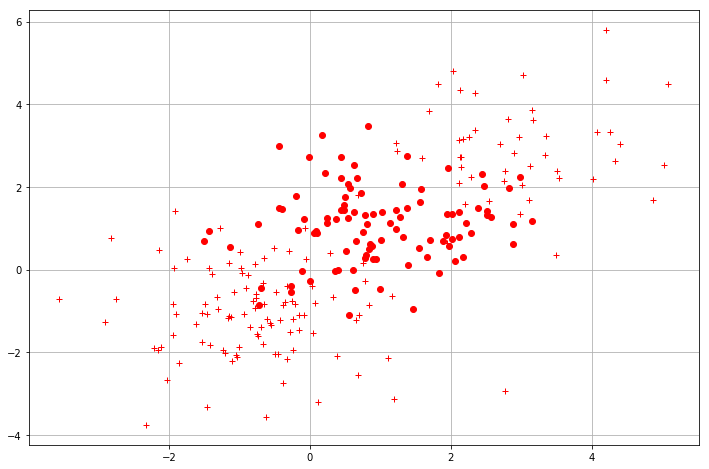

In [22]:
x_train, y_train = gen_multimodal()
x_test, y_test = gen_multimodal()


vis_data(x_train, y_train, c='r')
vis_data(x_test, y_test, c='r')

## 5.2. Kernel SVM
Instruction: Implement a kernel function.

C:\Users\home\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Number of support vectors:  89


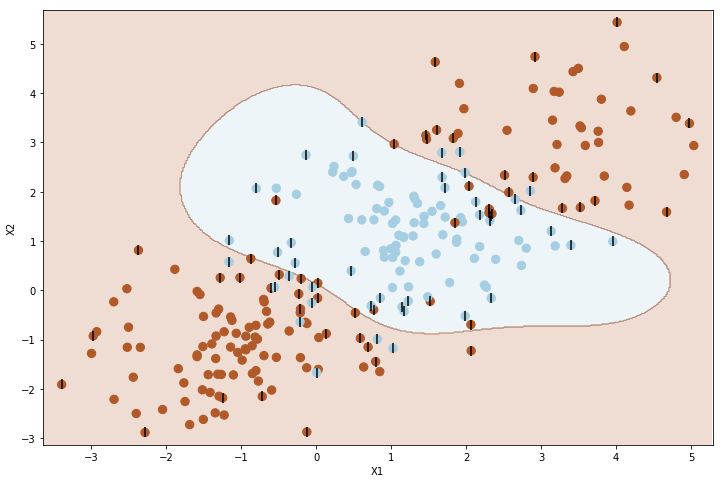

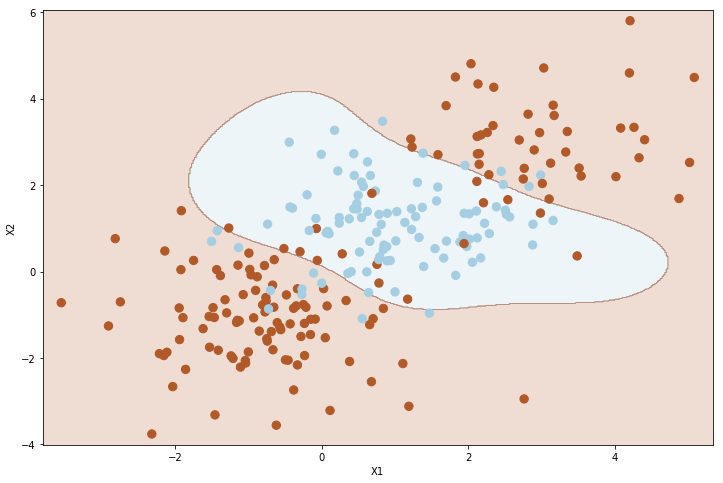

In [23]:
svm = SVC(C=1.0, kernel='rbf')
svm.fit(x_train, y_train)


plot_svc(svm, x_train, y_train, plot_support_vector=True)
plot_svc(svm, x_test, y_test, plot_support_vector=False)

Let's find the best parameters by grid search. Please implement gridsearch function in YourAnswer.py

In [24]:
# Set the parameters for cross-validation
# You can change parameters to find optimal parameter(C, gamma)
# and also modify another parameter in GridSearchCV(CV).

tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]

clf = gridsearch(tuned_parameters, x_train, y_train)

print("Grid scores")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Grid scores

0.600 (+/-0.000) for {'C': 0.01, 'gamma': 0.5}
0.600 (+/-0.000) for {'C': 0.01, 'gamma': 1}
0.600 (+/-0.000) for {'C': 0.01, 'gamma': 2}
0.600 (+/-0.000) for {'C': 0.01, 'gamma': 3}
0.600 (+/-0.000) for {'C': 0.01, 'gamma': 4}
0.864 (+/-0.125) for {'C': 0.1, 'gamma': 0.5}
0.864 (+/-0.073) for {'C': 0.1, 'gamma': 1}
0.816 (+/-0.109) for {'C': 0.1, 'gamma': 2}
0.752 (+/-0.060) for {'C': 0.1, 'gamma': 3}
0.704 (+/-0.064) for {'C': 0.1, 'gamma': 4}
0.860 (+/-0.157) for {'C': 1, 'gamma': 0.5}
0.868 (+/-0.129) for {'C': 1, 'gamma': 1}
0.864 (+/-0.153) for {'C': 1, 'gamma': 2}
0.860 (+/-0.135) for {'C': 1, 'gamma': 3}
0.856 (+/-0.135) for {'C': 1, 'gamma': 4}
0.880 (+/-0.143) for {'C': 10, 'gamma': 0.5}
0.856 (+/-0.130) for {'C': 10, 'gamma': 1}
0.844 (+/-0.197) for {'C': 10, 'gamma': 2}
0.836 (+/-0.180) for {'C': 10, 'gamma': 3}
0.852 (+/-0.160) for {'C': 10, 'gamma': 4}
0.852 (+/-0.143) for {'C': 100, 'gamma': 0.5}
0.836 (+/-0.191) for {'C': 100, 'gamma': 1}
0.824 (+/-0.135) fo

In [25]:
clf.best_params_

{'C': 10, 'gamma': 0.5}

In [26]:
# Check the accuracy of the best model
clf.best_estimator_.score(x_test,y_test)

0.872

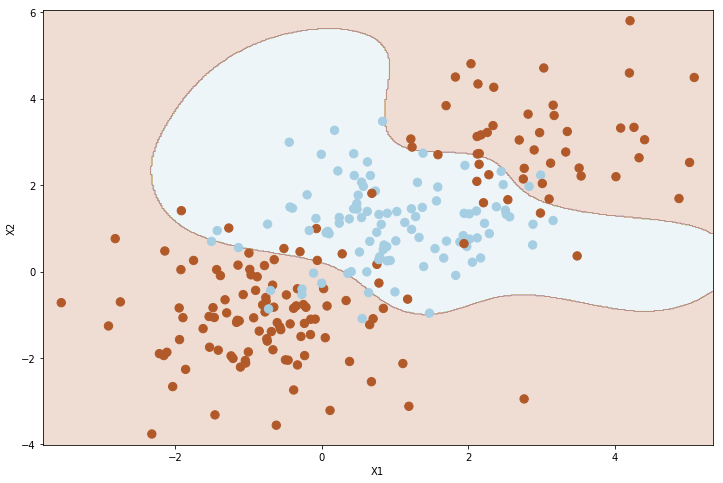

In [27]:
plot_svc(clf.best_estimator_, x_test, y_test, plot_support_vector=False)